<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/ELT575_Semana2_51687.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape x_train: (50000, 32, 32, 3)
Shape y_train: (50000, 10)
Shape x_test : (10000, 32, 32, 3)
Shape y_test : (10000, 10)


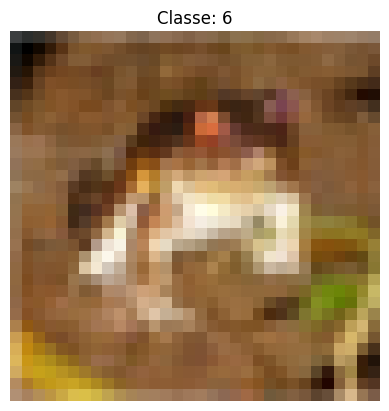

In [1]:
# ===============================
# 1. Importação de bibliotecas
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# ===============================
# 2. Carregamento do dataset CIFAR-10
# ===============================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ===============================
# 3. Normalização das imagens
# ===============================
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# ===============================
# 4. One-hot encoding dos rótulos
# ===============================
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# ===============================
# 5. Verificação rápida
# ===============================
print("Shape x_train:", x_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape x_test :", x_test.shape)
print("Shape y_test :", y_test.shape)

# Visualizar uma imagem de exemplo
plt.imshow(x_train[0])
plt.title("Classe: {}".format(np.argmax(y_train[0])))
plt.axis("off")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.2265 - loss: 2.1281 - val_accuracy: 0.3154 - val_loss: 1.9090
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.3696 - loss: 1.8067 - val_accuracy: 0.3986 - val_loss: 1.7240
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.4238 - loss: 1.6489 - val_accuracy: 0.4537 - val_loss: 1.5638
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.4689 - loss: 1.5143 - val_accuracy: 0.4851 - val_loss: 1.4474
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.5081 - loss: 1.3991 - val_accuracy: 0.5086 - val_loss: 1.3939
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.5329 - loss: 1.3321 - val_accuracy: 0.5173 - val_loss: 1.3604
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.5480 - loss: 1.2837 - val_accuracy: 0.5363 - val_loss: 1.2938
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.5651 - loss: 1.2388 - 

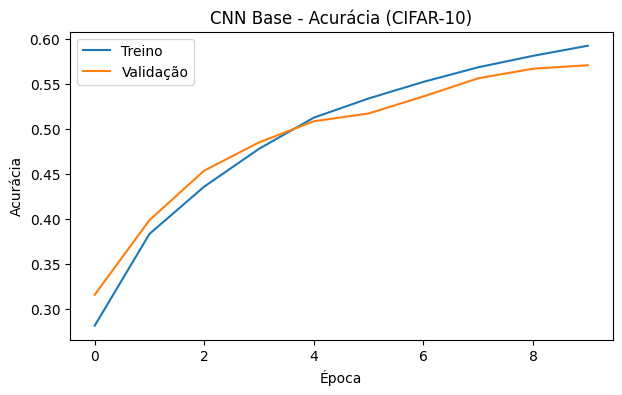

In [2]:
# ===============================
# 2. Modelo CNN base (CIFAR-10)
# ===============================
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# (opcional) nomes das classes para depois interpretar resultados
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Definição do modelo (igual ao exemplo, mas com input 32x32x3)
model_base = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

# Compilação (SGD + entropia cruzada categórica + acurácia)
model_base.compile(
    optimizer=SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Resumo do modelo (para colocar no relatório)
model_base.summary()

# Treinamento
history_base = model_base.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Avaliação no teste
test_loss, test_acc = model_base.evaluate(x_test, y_test, verbose=0)
print(f"\nTeste - Loss: {test_loss:.4f} | Accuracy: {test_acc:.4f}")

# Curvas de aprendizado (treino vs validação)
plt.figure(figsize=(7,4))
plt.plot(history_base.history["accuracy"], label="Treino")
plt.plot(history_base.history["val_accuracy"], label="Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("CNN Base - Acurácia (CIFAR-10)")
plt.legend()
plt.show()


“Sim. O desempenho foi significativamente inferior ao exemplo original, pois o CIFAR-10 apresenta maior complexidade visual. O modelo base mostrou limitações de capacidade, caracterizando underfitting.”

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,030 (324.34 KB)

 Trainable params: 83,030 (324.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.1165 - loss: 2.2953 - val_accuracy: 0.2120 - val_loss: 2.1934
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.2054 - loss: 2.1199 - val_accuracy: 0.2568 - val_loss: 2.0178
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.2515 - loss: 2.0073 - val_accuracy: 0.3087 - val_loss: 1.9309
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.2920 - loss: 1.9280 - val_accuracy: 0.3249 - val_loss: 1.8404
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.3265 - loss: 1.8301 - val_accuracy: 0.3374 - val_loss: 1.8516
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.3531 - loss: 1.7584 - val_accuracy: 0.3975 - val_loss: 1.6694
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.3825 - loss: 1.6769 - val_accuracy: 0.4181 - val_loss: 1.6209
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.4047 - loss: 1.6285 - 

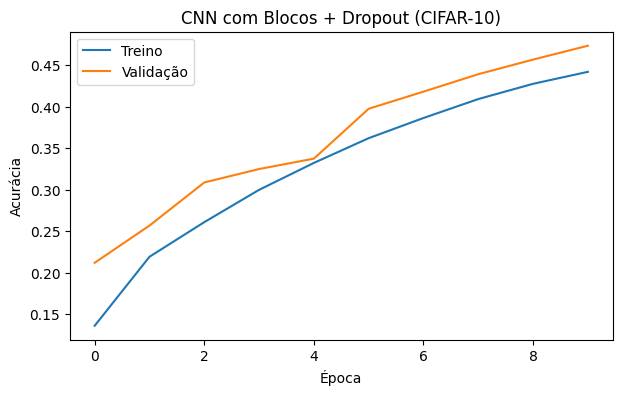

In [3]:
# ===============================
# 4. CNN com blocos convolucionais + Dropout
# ===============================
from tensorflow.keras.layers import Dropout

model_dropout = Sequential([
    # Bloco 1
    Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Bloco 2
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Bloco 3
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

model_dropout.compile(
    optimizer=SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_dropout.summary()

# Treinamento
history_dropout = model_dropout.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Avaliação
test_loss_d, test_acc_d = model_dropout.evaluate(x_test, y_test, verbose=0)
print(f"\nTeste - Loss: {test_loss_d:.4f} | Accuracy: {test_acc_d:.4f}")

# Curvas de aprendizado
plt.figure(figsize=(7,4))
plt.plot(history_dropout.history["accuracy"], label="Treino")
plt.plot(history_dropout.history["val_accuracy"], label="Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("CNN com Blocos + Dropout (CIFAR-10)")
plt.legend()
plt.show()
